In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from scipy import stats
import statistics

import matplotlib.gridspec as gridspec


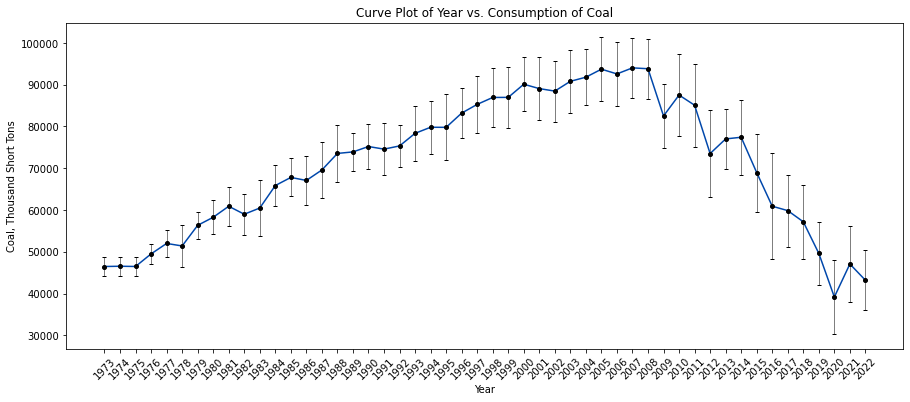

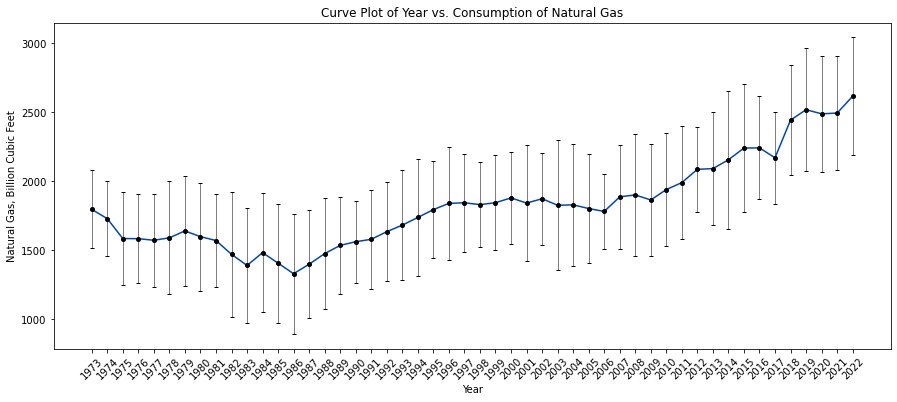

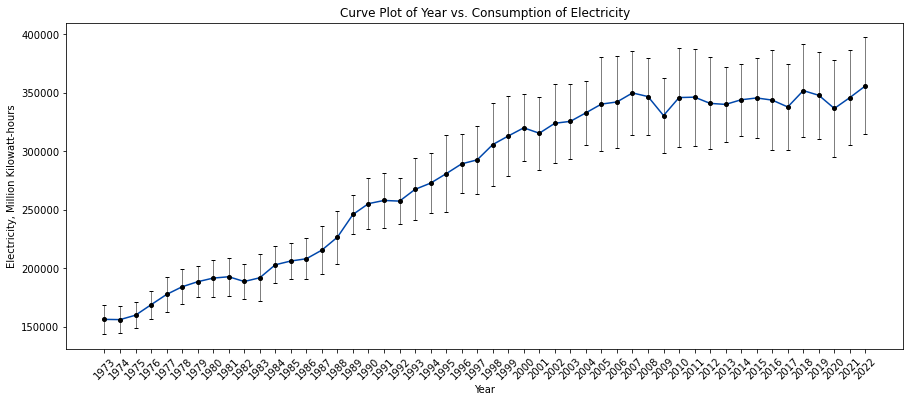

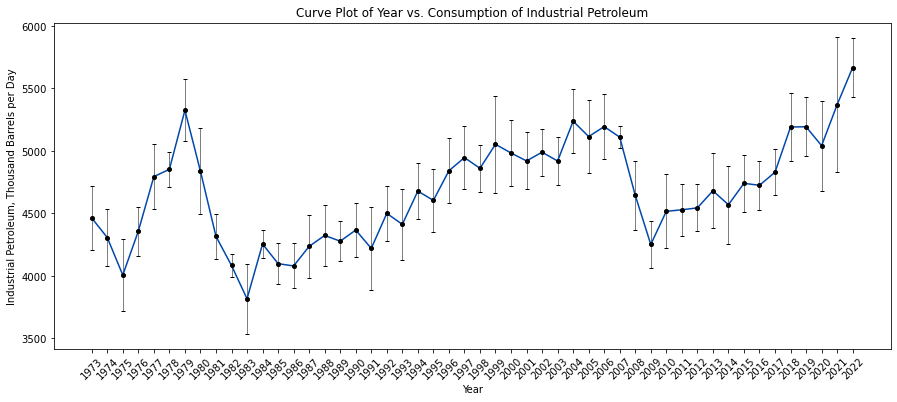

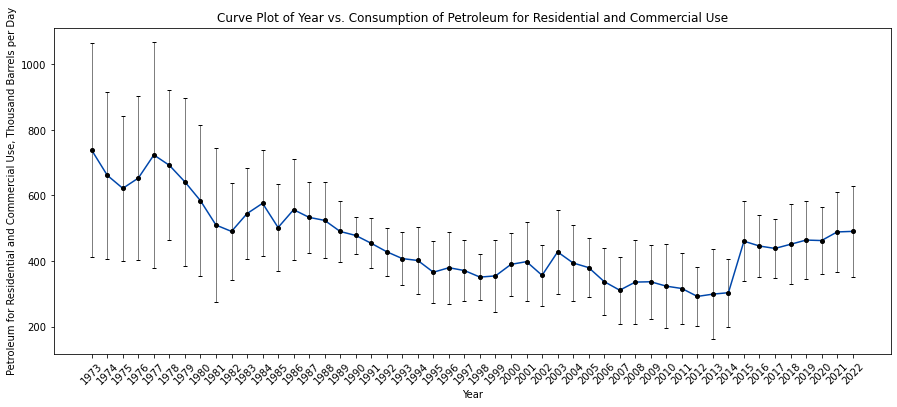

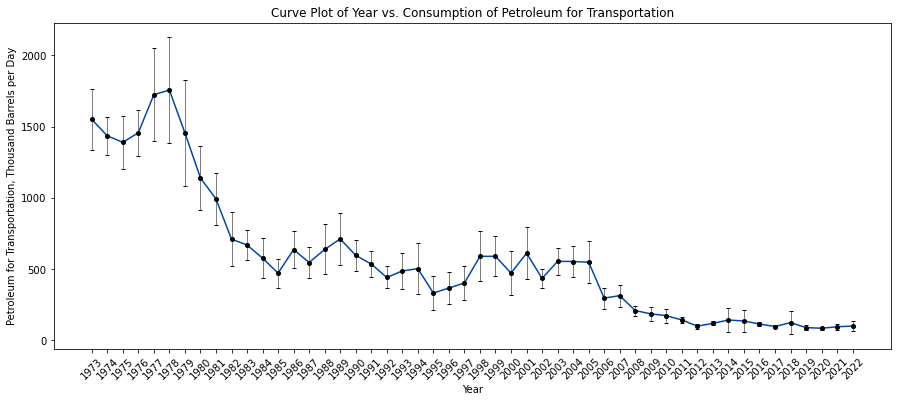

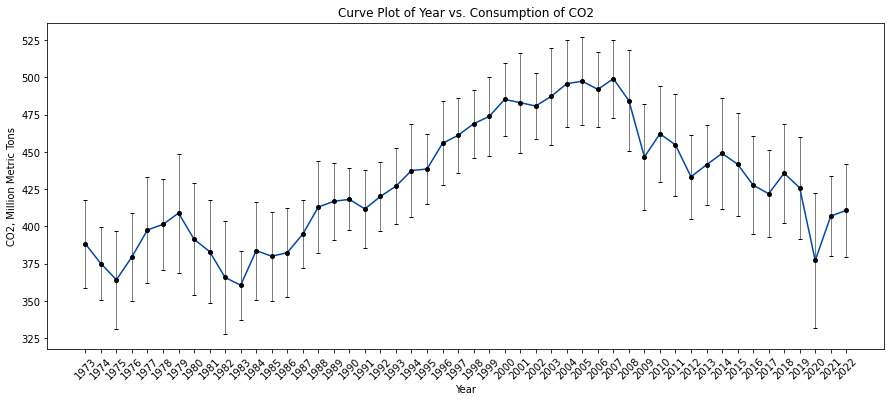

In [2]:
data = pd.read_csv('ml_data_variable.csv')
df_year = data['Year']
df_coal = data['COAL, Thousand Short Tons']
df_naturalgas = data['NATURALGAS, Billion Cubic Feet']
df_electricity = data['ELECTRICITY, Million Kilowatthours']
df_petro_industrial = data['PETRO_INDUSTRIAL, Thousand Barrels per Day']
df_petro_residential_commercial = data['PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day']
df_petro_transportation = data['PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']
df_co2 = data['CO2, Million Metric Tons']                 


year_list = []
for i in df_year:
    if not str(i)[:4] in year_list:
        year_list.append(str(i)[:4])


def average12month(energy):
    averages, std_list = [], []
    for i in range(0, len(energy), 12):
        chunk = energy[i:i+10]
        avg = sum(chunk) / len(chunk)
        averages.append(avg)

        std = statistics.stdev(chunk)
        std_list.append(std)

    return [averages, std_list]



def plotfigure(year, average, error, unit):
    plt.figure(figsize=(15, 6))
    plt.plot(year, average, color = '#0047AB')
    plt.errorbar(year, average, yerr = error, fmt ='o', markersize=4, capsize=2, color = 'black', elinewidth=0.5)

    # Add a title and labels for the x and y axes
    plt.title('Curve Plot of Year vs. Consumption of {}'.format(unit.split(',')[0]))
    plt.xlabel('Year')
    plt.ylabel(unit)

    plt.xticks(year_list, year_list, rotation=45)
    plt.savefig('Curve_Plot_Year_Consumption_{}.png'.format(unit.split(',')[0]))
    # Display the plot
    plt.show()

    
coal_average = average12month(df_coal)[0]
coal_error = average12month(df_coal)[1]
coal_plot = plotfigure(year_list, coal_average, coal_error, 'Coal, Thousand Short Tons')




naturalgas_average = average12month(df_naturalgas)[0]
naturalgas_error = average12month(df_naturalgas)[1]
naturalgas_plot = plotfigure(year_list, naturalgas_average, naturalgas_error, 'Natural Gas, Billion Cubic Feet')


electricity_average = average12month(df_electricity)[0]
electricity_error = average12month(df_electricity)[1]
electricity_plot = plotfigure(year_list, electricity_average, electricity_error, 'Electricity, Million Kilowatt-hours')

petro_industrial_average = average12month(df_petro_industrial)[0]
petro_industrial_error = average12month(df_petro_industrial)[1]
petro_industrial_plot = plotfigure(year_list, petro_industrial_average, petro_industrial_error, 'Industrial Petroleum, Thousand Barrels per Day')


petro_residential_commercial_average = average12month(df_petro_residential_commercial)[0]
petro_residential_commercial_error = average12month(df_petro_residential_commercial)[1]
petro_residential_plot = plotfigure(year_list, petro_residential_commercial_average, petro_residential_commercial_error, 'Petroleum for Residential and Commercial Use, Thousand Barrels per Day')

petro_transportation_average = average12month(df_petro_transportation)[0]
petro_transportation_commercial_error = average12month(df_petro_transportation)[1]
petro_transportation_plot = plotfigure(year_list, petro_transportation_average, petro_transportation_commercial_error, 'Petroleum for Transportation, Thousand Barrels per Day')


co2_average = average12month(df_co2)[0]
co2_error = average12month(df_co2)[1]
co2_plot = plotfigure(year_list, co2_average, co2_error, 'CO2, Million Metric Tons')




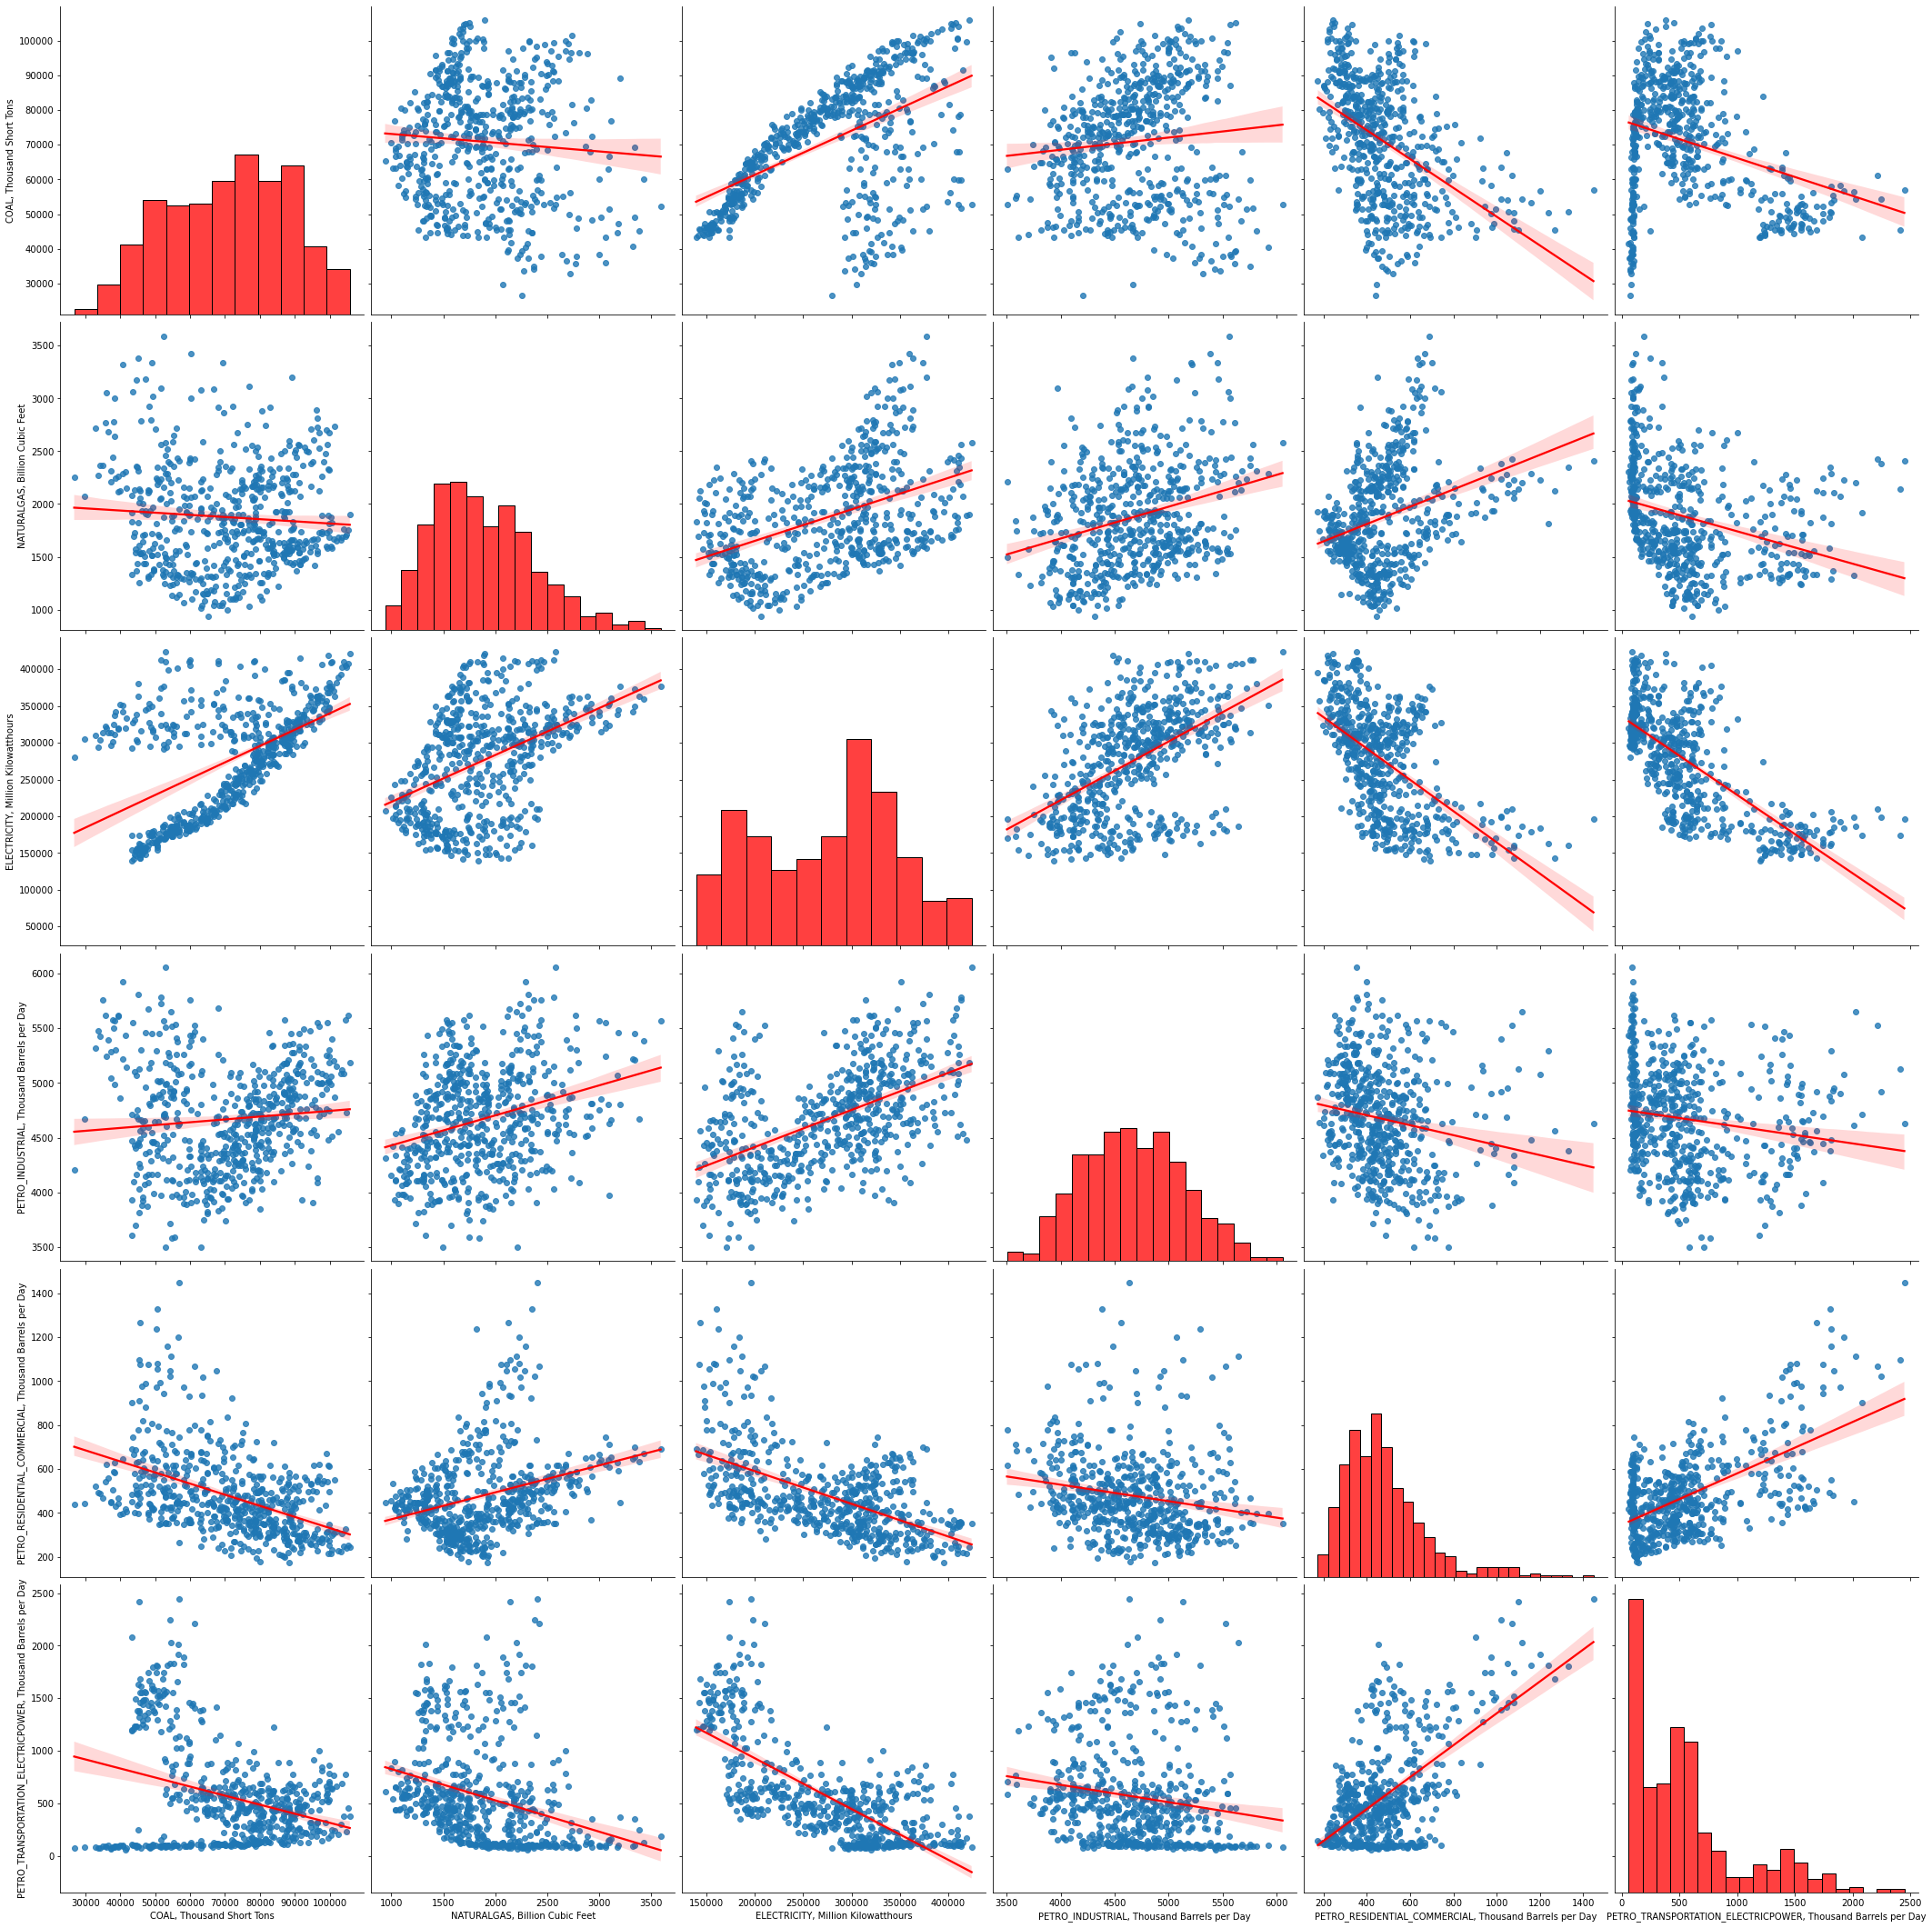

In [3]:
total_co2 = pd.read_csv('Carbon_Dioxide_Emissions_From_Energy.csv')
COAL = pd.read_csv('COAL_clean_total_consumption.csv')
NATURALGAS = pd.read_csv('NATURAL_GAS_clean_total_consumption.csv')
ELECTRICITY = pd.read_csv('ELECTRICITY_NET_GENERATION_clean_total_consumption.csv')
PETRO_INDUSTRIAL = pd.read_csv('PETROLEUM_INDUSTRIAL_clean_total_consumption.csv')
PETRO_RESIDENTIAL_COMMERCIAL = pd.read_csv('PETROLEUM_RESIDENTIAL_COMMERCIAL_clean_total_consumption.csv')
PETRO_TRANSPORTATION_ELECTRICPOWER = pd.read_csv('PETROLEUM_TRANSPORTATION_ELECTRICPOWER_clean_total_consumption.csv')


Xcoal = COAL['Value'] # "Thousand Short Tons"
Xnatural = NATURALGAS['Value'] # "Billion Cubic Feet"
Xelectrity = ELECTRICITY['Value'] # "Million Kilowatthours"
Xpetro_indus = PETRO_INDUSTRIAL['Value'] # "Thousand Barrels per Day"
Xpetro_res_com = PETRO_RESIDENTIAL_COMMERCIAL['Value'] # "Thousand Barrels per Day"
Xpetro_trans_elec = PETRO_TRANSPORTATION_ELECTRICPOWER['Value'] # "Thousand Barrels per Day"

Yco2 = total_co2['Total Energy CO2 Emissions (Million Metric Tons of Carbon Dioxide)']

data_variable = pd.DataFrame({'COAL, Thousand Short Tons': Xcoal.values.tolist(),
                   'NATURALGAS, Billion Cubic Feet': Xnatural.values.tolist(),
                   'ELECTRICITY, Million Kilowatthours': Xelectrity.values.tolist(),
                   'PETRO_INDUSTRIAL, Thousand Barrels per Day': Xpetro_indus.values.tolist(),
                   'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day': Xpetro_res_com.values.tolist(),
                   'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day': Xpetro_trans_elec.values.tolist()
                   #'CO2, Million Metric Tons': Yco2.values.tolist()
                  })

#data_variable.to_csv('ml_data_variable.csv', index=False)
#sns.pairplot(data = data_variable, height = 5)
g = sns.pairplot(data = data_variable, kind='reg', diag_kws={'color':'red'}, plot_kws={'line_kws':{'color':'red'}}, height = 5)
g.savefig('Pairplot_Plot_Energy_Consumption.png', dpi=300)
